<a href="https://colab.research.google.com/github/Vonewman/Deep_Learning_models_with_pytorch/blob/master/Neural_Network_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural networks with PyTorch

Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous notebook, but in general it's very cumbersome and difficult to implement. PyTorch has a nice module `nn` that provides a nice way to efficiently build large neural networks.

In [0]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

## Download the MNIST datasets

In [3]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


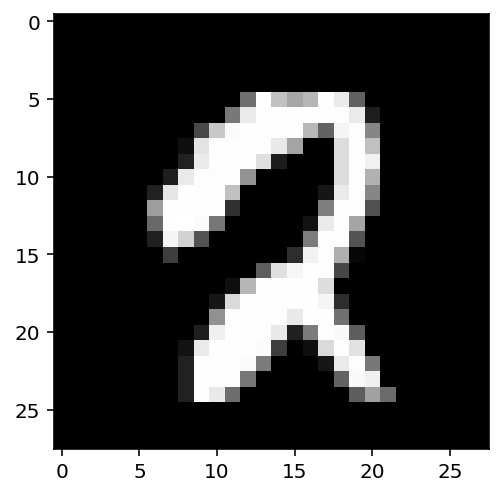

In [0]:
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r')

In [0]:
## Solution
def activation(x):
  return 1/(1 + torch.exp(-x))

# Flatten the input images 
inputs = images.view(images.shape[0], -1)

# create parameters 
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [6]:
# shape of the output
print(out.shape)

torch.Size([64, 10])


In [7]:
# output of this network
print(out)

tensor([[ 10.5865,   1.1304, -16.0917,  15.6834,   7.3595,   7.2271,  -1.5350,
           5.4961, -16.2335,   0.8729],
        [ -6.4218,   3.2265, -12.0400,   2.1712,   6.5696,   5.5885,   2.0303,
          11.4941,  -9.1172,   2.2031],
        [ 10.8947,   4.2192, -12.0227,   8.5926,   2.5690,   2.1430,  -6.7003,
          18.4273, -10.7352,  11.0150],
        [  7.3440,   3.7535, -12.5278,   8.9863,   7.5441,  12.0524,  -8.3484,
           3.1226,  -8.6451,   0.7361],
        [  4.1578,   3.8713,  -9.4386,  -9.2179,  -1.1174,  -1.7442, -10.3521,
           7.8801, -20.9247,   3.3343],
        [ -7.6736,  -3.3866, -18.5140,  11.8180,  10.3566,  -0.3377,   1.5712,
           4.7329, -13.7618,   5.6424],
        [  9.1120,   5.6668, -20.4376,   6.8100,  -1.0490,  -4.1587,   2.5284,
           7.4449,  -1.2881,  -2.4503],
        [  0.6442,  -2.0981, -12.0474,  -1.8495,   1.9449,   6.2568,  -2.8875,
           9.2861,  -7.4698,   5.2004],
        [  7.8932,  -0.3378, -13.0427,   1.0100,

In [8]:
## softmax
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

print(probabilities.shape)

print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with Pytorch

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Input to hidden layer Linear transformation
    self.hidden = nn.Linear(784, 256)

    # Output layer, 10 units - one from each digit
    self.output = nn.Linear(256, 10)

    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax()

  def forward(self, x):
    # Pass the input Tensor through each of the operation
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

In [11]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=None)
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Input to hidden layer Linear transformation
    self.hidden = nn.Linear(784, 256)

    # Output layer, 10 units - one from each digit
    self.output = nn.Linear(256, 10)

  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)

    return x